In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()[:-8]+'/Analysis_Funcs/LC_Sim/')
sys.path.append(os.getcwd()[:-8]+'/Analysis_Funcs/General')
from fitsloader import XMMtolc
from astropy.io import fits
from CurveFit import GaussCurve
from astropy.modeling.models import Const1D
from stingray.modeling import GaussianLogLikelihood, ParameterEstimation

/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/utils.py:24: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(


display the observation

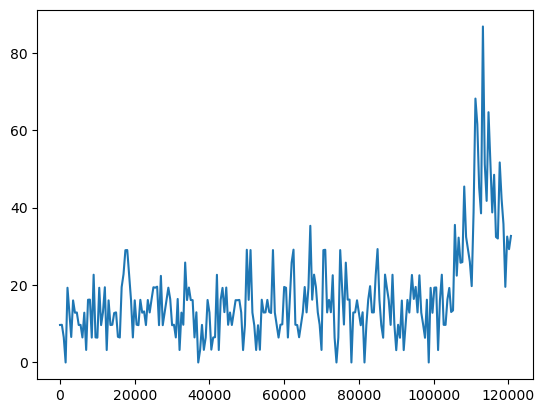

In [2]:
lc = XMMtolc('obs/0604860301_.2-2.0_t50_pn.lc',t_bin=50).rebin(500)
lc = lc.shift(-lc.time[0])
lc.plot()

Look at the flare

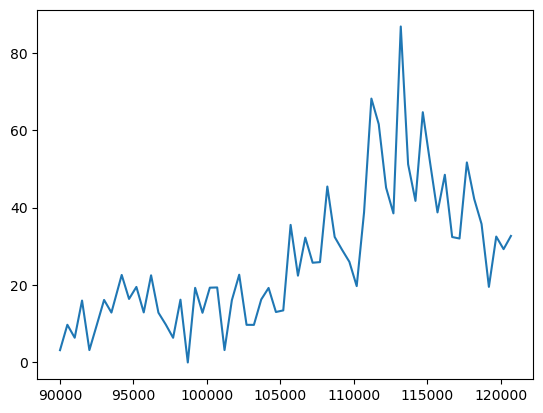

In [3]:
lc_flare = lc.truncate(start=90000,method='time')
lc_flare.plot()

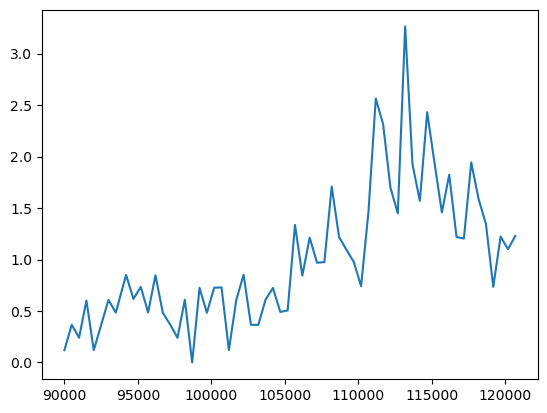

In [4]:
plt.plot(lc_flare.time,lc_flare.countrate/lc_flare.meanrate)

Model flare and determine the peak time, height and width

         Current function value: 251.484735
         Iterations: 55
         Function evaluations: 482
         Gradient evaluations: 94


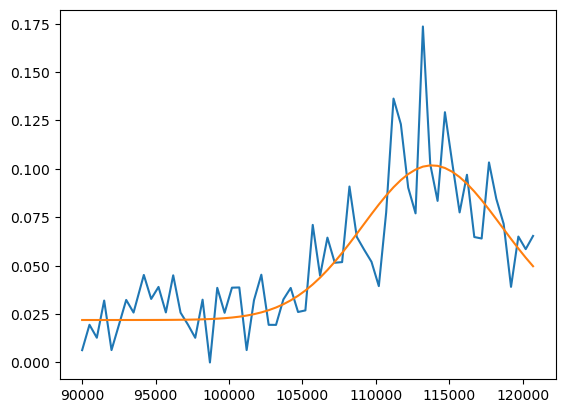

In [5]:
model = Const1D() + GaussCurve()
start_pars = [5,25,20000,115000]
loglike = GaussianLogLikelihood(lc_flare.time,lc_flare.counts,lc_flare.counts_err,model)
parest = ParameterEstimation(fitmethod='BFGS', max_post=False)
res = parest.fit(loglike,start_pars,scipy_optimize_options={'options':{'maxiter':100000,'gtol':1e-10,'disp':True}})
#res.print_summary(loglike)
res.mfit /= lc_flare.dt
#pdb.set_trace()
fig, ax = plt.subplots()
plt.plot(lc_flare.time,lc_flare.countrate)
plt.plot(lc_flare.time,res.mfit)
plt.show()

In [6]:
print('Quiescent Rate: ',model.parameters[0]/lc_flare.dt)
print('Eruption Height: ',model.parameters[1]/lc_flare.dt)
print('Flare Duration (FWHM): ',model.parameters[2])
print('Flare Peak Position: ',model.parameters[3])

Quiescent Rate:  0.021940484053406806
Eruption Height:  0.07990539422587382
Flare Duration (FWHM):  11148.60391387234
Flare Peak Position:  113817.99530908857


Energy band comparisons for flare

In [ ]:
band1 = XMMtolc('obs/0604860301_.2-.5_t50_pn.lc',t_bin=50).rebin(1000)